<a href="https://colab.research.google.com/github/foxtrotmike/CS909/blob/master/dm_lab_2_fm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise-2
## by Fayyaz Minhas
## Understanding how intuition fails in high dimensions
We have seen how a nearest neighbor classifier works: by labeling a test examples based on the label of its nearest training example. One of the questions we are interested in is "Why do we need multiple different types of classifiers if we have nearest neighbor classifier?". In order to answer that question, we need to understand how distance, especially Euclidean distance which is typically used in the nearest neighbor classifier, works and how it is affected by the "Curse of Dimensionality". To do that, we are going to be doing a small computational experiemnt in the lab session: we will generate random data in a number of dimensions and try to explore how the number of data points in a fixed number of dimensions affects the notion of "nearest". To do that, let's do a thought experiment first: Assume you had an infinite number of points in $d$ dimensions and were interested in finding the closest and farthest points from an arbitrary point, say origin. Since the Euclidean distance between two points $p$ and $q$ is given by $d(p,q)=||p-q||=\sqrt{(p_1-q_1)^2+(p_2-q_2)^2+...+(p_d-q_d)^2}$ and because we, in our thought experiment, have an infinite amount of points, therefore the closest point to the origin will be at a distance 0 from the origin whereas the farthest point will be $(1,1,1...,1)$ and its distance from origin will be $\sqrt{d}$. Thus the expected difference between the distance of the farthest and closest points to the origin will be $\sqrt(d)$. The code below generates a number $n$ of points in different number of dimensions $d$ from 1 to 10 and plots the actual difference between the closest and farthest points from the origin (henceforth called contrast!) together with the expected contrast. Please:

1. Try to understand how the code works
2. Change the number of points $n$ from 2, 4, 8, 16, 32, 64 and so on and see how the actual contrast differs from the expected contrast.
3. Note down your observations about this and try to figure out what's going on



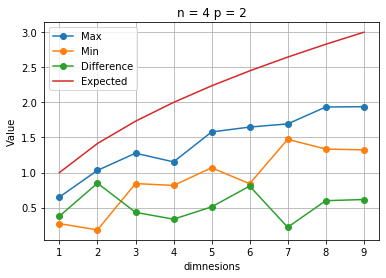

In [1]:
from numpy.random import rand
import matplotlib.pyplot as plt #importing plotting module
import numpy as np

n = int(4) # to do: change this number and re-run and think about what's going on
p = 2 
D = np.arange(1,10,1)
va = []
for d in D:
    Xp = rand(n,d)
    Xnorm = np.linalg.norm(Xp,axis = 1, ord = p)
    M = np.max(Xnorm)
    m = np.min(Xnorm)
    va.append((M,m,M-m))
    
plt.plot(D,va,'o-');plt.plot(D,D**(1.0/p));plt.grid()
plt.legend(['Max','Min','Difference','Expected'])
plt.xlabel('dimnesions')
plt.ylabel('Value')
plt.title('n = '+str(n)+' p = '+str(p))
plt.show()

You should be able to clearly see that, unless the number of points is very large, in higher dimensions, the actual contrast does not change as fast as the expected contrast. You should also see that with very high number of dimensions, the actual contrast actually flat lines. What this means is that the farthest point from the origin is actually as far away as the closest point! Thus, the notion of nearest point disappears in higher dimensions unless you have a very large number of points. This is a known effect of the curse of dimensionality which limits the applicability of nearest neighbor and other distance or similarity based prediction models. We need better models to esacape the curse of dimensionality in real life where we do not have access to infinite number of points and the number of features can be very large!

# Understanding gradient Descent

We discussed how gradient descent works for solving optimization problems: By taking steps in a direction opposite to the gradient. Below is a very simple implementation for this method. Based on this, can you:
1. Try to understand how Gradient Descent Works
2. Can you find the  minima of the following function: $f(x)=2x^2-x$. You will need to update the implementation of the function and its derivative in the code for this.
3. What happens when you use: $f(x)=sin(3x)$? Is this function convex?
4. What do you think, are the limitations of gradient descent for convex functions?
5. What happens when you change the learning rate parameter (step size)?



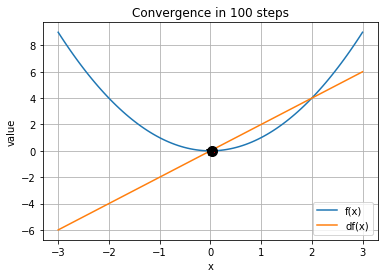

In [2]:
import numpy as np

def gd(f,df,x0=0.0,lr = 0.01,eps=1e-4,nmax=1000, history = True):
    """
    Implementation of a gradient descent solver.
        f: function, f(x) returns value of f(x) for a given x
        df: gradient function df(x) returns the gradient at x
        x0: initial position [Default 0.0]
        lr: learning rate [0.001]
        eps: min step size threshold [1e-4]
        nmax: maximum number of iters [1000]
        history: whether to store history of x or not [True]
    Returns:
        x: argmin_x f(x)
        converged: True if the final step size is less than eps else false
        H: history
    """
    H = []
    x = x0
    if history:
        H = [[x,f(x)]]
    for i in range(nmax):
        dx = -lr*df(x) #gradient step
        if np.linalg.norm(dx)<eps: # if the step taken is too small, we have converged
            break
        if history:
            H.append([x+dx,f(x+dx)])
        x = x+dx #gradient update
    converged = np.linalg.norm(dx)<eps        
    return x,converged,np.array(H)
    
if __name__=='__main__':
    import matplotlib.pyplot as plt
    def f(x):
        y = x**2
        return y
    def df(x):
        dy = 2*x
        return dy
    

    z = np.linspace(-3,3,100)
    #select random initial point in the range
    x0 = np.min(z)+(np.max(z)-np.min(z))*np.random.rand()
    
    x,c,H = gd(f,df,x0=x0,lr = 0.01,eps=1e-4,nmax=1000, history = True) 
    
    plt.plot(z,f(z)); plt.plot(z,df(z));
    plt.legend(['f(x)','df(x)'])
    plt.xlabel('x');plt.ylabel('value')
    s = 'Convergence in '+str(len(H))+' steps'
    if not c:
        s = 'No '+s
    plt.title(s)
    plt.plot(H[0,0],H[0,1],'ko',markersize=10)
    plt.plot(H[:,0],H[:,1],'r.-')
    plt.plot(H[-1,0],H[-1,1],'k*',markersize=10)    
    plt.grid(); plt.show()

## Working with Ordinary Least Squares

We have discussed how OLS works: Given some training data it finds a weight vector and bias by minimizing the sum of squares error between target and predicted output of each example. In this lab session, we explore how OLS and nearest neighbor classifier can be used to solve a practical problem. But before that, we test it on a toy problem. Below is the code for plotting (you can safely ignore it!). Please see the cell after the plotting function for the toy example in which we use Sk-learn OLS [(help availabel here)](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

In [0]:
from numpy.random import randn #importing randn
import numpy as np #importing numpy
import matplotlib.pyplot as plt #importing plotting module
import itertools
import warnings

def plotit(X,Y=None,clf=None,  conts = None, ccolors = ('b','k','r'), colors = ('c','y'), markers = ('s','o'), hold = False, transform = None,extent = None,**kwargs):
    """
    A function for showing data scatter plot and classification boundary
    of a classifier for 2D data
        X: nxd  matrix of data points
        Y: (optional) n vector of class labels
        clf: (optional) classification/discriminant function handle
        conts: (optional) contours (if None, contours are drawn for each class boundary)
        ccolors: (optional) colors for contours   
        colors: (optional) colors for each class (sorted wrt class id)
            can be 'scaled' or 'random' or a list/tuple of color ids
        markers: (optional) markers for each class (sorted wrt class id)
        hold: Whether to hold the plot or not for overlay (default: False).
        transform: (optional) a function handle for transforming data before passing to clf
        kwargs: any keyword arguments to be passed to clf (if any)        
    """
    if clf is not None and X.shape[1]!=2:
        warnings.warn("Data Dimensionality is not 2. Unable to plot.")
        return
    if markers is None:
        markers = ('.',)
    eps=1e-6
    d0,d1 = (0,1)
    if extent is None:
        minx, maxx = np.min(X[:,d0])-0.5, np.max(X[:,d0])+0.5
        miny, maxy = np.min(X[:,d1])-0.5, np.max(X[:,d1])+0.5
        extent = [minx,maxx,miny,maxy]
    else:
        [minx,maxx,miny,maxy] = extent
    if Y is not None:
        classes = sorted(set(Y))
        if conts is None or len(conts)<2:
            #conts = list(classes)
            vmin,vmax = classes[0]-eps,classes[-1]+eps
        else:            
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    else:
        vmin,vmax=-2-eps,2+eps
        if conts is None or len(conts)<2:            
            conts = sorted([-1+eps,0,1-eps])
        else:
            vmin,vmax= np.min(conts)-eps,np.max(conts)+eps
        
    if clf is not None:
        npts = 150
        x = np.linspace(minx,maxx,npts)
        y = np.linspace(miny,maxy,npts)
        t = np.array(list(itertools.product(x,y)))
        if transform is not None:
            t = transform(t)
        z = clf(t,**kwargs)
        
        z = np.reshape(z,(npts,npts)).T        
        
        
        plt.contour(x,y,z,conts,linewidths = [2],colors=ccolors,extent=extent, label='f(x)=0')
        #plt.imshow(np.flipud(z), extent = extent, cmap=plt.cm.Purples, vmin = -2, vmax = +2); plt.colorbar()
        plt.pcolormesh(x, y, z,cmap=plt.cm.Purples,vmin=vmin,vmax=vmax);plt.colorbar()
        plt.axis(extent)
    
    if Y is not None:        
        for i,y in enumerate(classes):
            
            if colors is None or colors=='scaled':
                cc = np.array([[i,i,i]])/float(len(classes))
            elif colors =='random':
                cc = np.array([[np.random.rand(),np.random.rand(),np.random.rand()]])
            else:
                cc = colors[i%len(colors)]
            
            mm = markers[i%len(markers)]
            plt.scatter(X[Y==y,d0],X[Y==y,d1], marker = mm,c = cc, s = 50)     
         
    else:
        plt.scatter(X[:,d0],X[:,d1],marker = markers[0], c = 'k', s = 5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')   
    if not hold:
        plt.grid()        
        plt.show()
    return extent



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: The following kwargs were not used by contour: 'label'


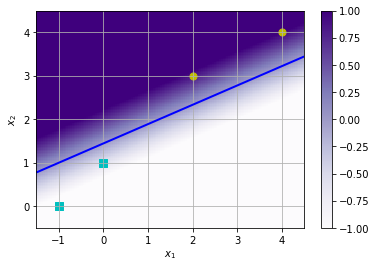

Weights:  [-0.57142857  1.28571429]


In [4]:
import numpy as np
X = np.array([[-1,0],[0,1],[4,4],[2,3]])
y =np.array([-1,-1,+1,+1])
from sklearn.linear_model import LinearRegression as OLS
clf = OLS()
clf = clf.fit(X, y)
plotit(X,y,clf=clf.predict,conts=[0.0])
print("Weights: ",clf.coef_)

1. What are your observations about the line that is drawn by this predictor?
2. What happens to the line if you change the data?
3. Is this line optimal? 
4. Can you predict the score and class label for a new test point, say [2,0]? Is this point classified correctly?
5. You can use clf.coef_ to get the weight vector learned by the OLS method. What do these weights and their signs tell you about your data? Try changing the data and observe how that impacts the weight vector.
6. What happens when your data is not linearly separable?

## Trying out Perceptron!

Let's try a single Perceptron on the same toy problem. More help on using Perceptron in sk-learn is available [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html). Here are some questions for you:

1. What are your observations about the line that is drawn by this predictor?
2. What happens to the line if you change the data?
3. Is this line optimal? 
4. Can you predict the score and class label for a new test point, say [2,0]? Is this point classified correctly?
5. You can use clf.coef_ to get the weight vector learned by the OLS method. What do these weights and their signs tell you about your data? Try changing the data and observe how that impacts the weight vector.
6. What happens when your data is not linearly separable?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: UserWarning: The following kwargs were not used by contour: 'label'


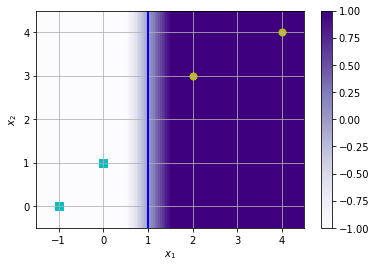

Weights:  [[2. 0.]]


In [5]:
from sklearn.linear_model import Perceptron
clf = Perceptron()
clf.fit(X,y)
plotit(X,y,clf=clf.decision_function,conts=[0.0])
print("Weights: ",clf.coef_)

## Classifying digits
Below is a code for classifying between MNIST digits (7 vs 9) using nearest neighbor and OLS classifiers. Please try to understand the code and answer the following questions.

Accuracy of kNN: 0.9476744186046512
Accuracy of OLS: 0.9534883720930233


Text(0.5, 1.05, 'Misclassified: Predicted as -0.5603215968934636')

<Figure size 432x288 with 0 Axes>

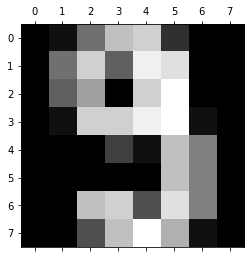

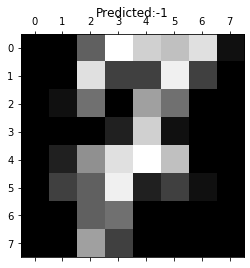

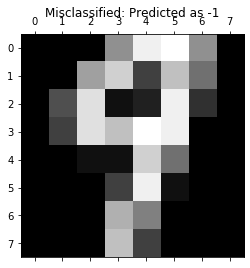

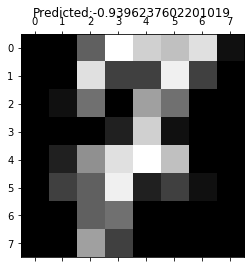

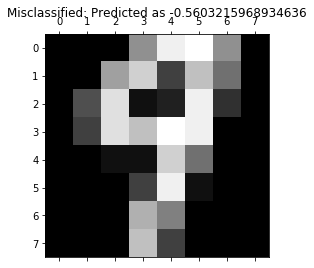

In [6]:
import numpy as np
from sklearn.datasets import load_digits
import random
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression as OLS
import matplotlib.pyplot as plt
digN,digP = 7,9
X,y = load_digits(n_class=10, return_X_y=True)
idx = (y==digP) + (y==digN) #Just focus on 7 and 9
X,y = X[idx,:], y[idx]
y[y==digN]=-1.0 #set (negative class)
y[y==digP]=+1.0 #set (positive class)
idx = list(range(len(y)))
random.shuffle(idx) # Just shuffle the data
X,y = X[idx,:], y[idx]
plt.gray();plt.matshow(X[0].reshape((8,-1))) # show an example

Ntr = 15 #select number of training examples
Xtr,Ytr = X[:Ntr], y[:Ntr]
Xtt,Ytt = X[Ntr:], y[Ntr:]

clf = KNeighborsClassifier(n_neighbors=1)
clf = clf.fit(Xtr, Ytr)
Z = clf.predict(Xtt)
print('Accuracy of kNN:',np.mean(Z==Ytt))
plt.gray();plt.matshow(Xtt[0].reshape((8,-1))); plt.title('Predicted:'+str(Z[0]))
error_idx = np.nonzero(Ytt!=np.sign(Z))[0][0] # show one error
plt.gray();plt.matshow(Xtt[error_idx].reshape((8,-1))); plt.title('Misclassified: Predicted as '+str(Z[error_idx])) # show a misclassification


clf = OLS()
clf = clf.fit(Xtr, Ytr)
Z = clf.predict(Xtt)
print('Accuracy of OLS:',np.mean(np.sign(Z)==Ytt))
plt.gray();plt.matshow(Xtt[0].reshape((8,-1))); plt.title('Predicted:'+str(Z[0]))
error_idx = np.nonzero(Ytt!=np.sign(Z))[0][0] # show one error
plt.gray();plt.matshow(Xtt[error_idx].reshape((8,-1))); plt.title('Misclassified: Predicted as '+str(Z[error_idx])) #show a misclassification


1. What is the relationship between accuracy over test examples and training set size for both classifiers? How can you design an experiment to do this?
2. Which classifier performs better and why?
3. Here, we are using each pixel as a feature. Can you extract better features that allow you to do better classification? 
4. You can plot the weight vector of the OLS as an image by using plt.matshow(clf.coef_.reshape(8,-1). What weights are not important? Why? What are the most important weights? why?

## Using Perceptron for Digit Classification

Use the codes provided above and compare the predictive performance of a perceptron for this problem.